###  Anualmente la Asociación de Promotores de Música en vivo (https://www.apmusicales.com/) crea un Anuario donde refleja un resumen de la información relevante del año vencido en cuanto a eventos musicales, festivales, etc.. Es significativo ya que dentro de dicha asociación actualmente están 88 de los promotores que están presentes a nivel nacional en la organización y promoción de este tipo de eventos musicales.

In [1]:
from PIL import Image
from pytesseract import pytesseract
import pandas as pd
import numpy as np

from os import path
from PIL import Image

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# pip install tesseract

### Al tratarse de un anuario que se presenta en forma física o en formato pdf no he podido recabar los datos a través de csv, json, xls u otro formato. He tenido que recurrir a una librería de reconocimiento de caracteres (OCR), concretamente pytesseract. Se detallan los pasos a seguir para poder realizar el reconocimiento de caracteres a través de una imagen en formato jpg:

I see steps are scattered in different answers. Based on my recent experience with this pytesseract error on Windows, writing different steps in sequence to make it easier to resolve the error:

1. Install tesseract using windows installer available at: https://github.com/UB-Mannheim/tesseract/wiki

2. Note the tesseract path from the installation. Default installation path at the time of this edit was: C:\Users\USER\AppData\Local\Tesseract-OCR. It may change so please check the installation path.

3. pip install pytesseract

4. Set the tesseract path in the script before calling image_to_string:

pytesseract.pytesseract.tesseract_cmd = r'C:\Users\USER\AppData\Local\Tesseract-OCR\tesseract.exe'

In [3]:
# Detallar la ruta donde está el ejecutable tesseract.exe. Previamente hay que hacer una instalación del driver y de la librería

pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

### De este anuario obtendré datos ecónomicos del sector de promotores musicales a agrupados por Comunidades Autónomas. Accedo a través de la librería a una imagen con la comunidades.

In [4]:
comunidades = pytesseract.image_to_string("..\data\datos_economicos\comunidades.JPG")
comunidades = comunidades.split("\n")
comunidades_tabla = []
for i in comunidades:
    comunidades_tabla.append(i.capitalize())
comunidades_tabla

['Andalucia',
 'Aragon',
 'Asturias',
 '',
 '1. baleares',
 'Canarias',
 'Cantabria',
 '',
 'C.- lamancha',
 'C.y leon',
 'Cataluna',
 'Ceuta y melilla',
 'C. madrid',
 '',
 'C. valenciana',
 'Extremadura',
 'Galicia',
 'Larioja',
 'Navarra',
 '',
 'Pais vasco',
 'R.murcia',
 '']

In [5]:
comunidades_fact = ['Andalucía',
 'Aragon',
 'Asturias',
 'Islas Baleares',
 'Canarias',
 'Cantabria',
 'C.- La Mancha',
 'C. y León',
 'Cataluña',
 'Ceuta y Melilla',
 'Madrid',
 'C. Valenciana',
 'Extremadura',
 'Galicia',
 'La Rioja',
 'Navarra',
 'Pais vasco',
 'Murcia',]

Accedo a la imagen de los datos de facturación neta de 2012 por comunidades

In [6]:
comunidades_12 = pytesseract.image_to_string(r"..\data\datos_economicos\facturacion_neta_comunidades_2012.JPG")
comunidades_12 = comunidades_12.split("\n")
comunidades_12

['21,055.34 €',
 '10.890.586 6',
 '1.996.607 €',
 '',
 '43562346 _',
 '1.270.568 €',
 '3811705 €',
 '67158616',
 '33,397.798 €',
 '181.509 €',
 '441068756',
 '',
 '18,695,507 €',
 '1816.097 ©',
 '',
 '726.039 €',
 '',
 '1.815.097 €',
 '13.613.233 €',
 '',
 '5.626.803 €',
 '']

In [7]:
facturacion_comunidades_2012 = ['21055134',
                                '10890586',                        
                                '1996607',
                                '3993215',
                                '4356234',
                                '1270568',
                                '3811705',
                                '6715861',
                                '33397798',
                                '181509',
                                '44106875',
                                '18695507',
                                '1816097',
                                '7441900',
                                '726039',
                                '1815097',
                                '13613233',
                                '5626803']

Accedo a la imagen de los datos de facturación neta de 2013 a 2022 por comunidades

In [8]:
comunidades_13_22 = pytesseract.image_to_string(r"..\data\datos_economicos\facturacion_neta_comunidades_2013_2022.JPG")
comunidades_13_22 = comunidades_13_22.split("\n")
comunidades_13_22

['18.973.783 €',
 '9.328.777 ©',
 '2.055.493 ©',
 '3.162.297 €',
 '3.952871',
 '948.689 €',
 '3.320.412 €',
 '6.482.709 €',
 '31.148.628 €',
 '158.114 €',
 '33.836.581 €',
 '17.392.635 €',
 '1.106.804 €',
 '6.324.594 €',
 '632.459 €',
 '1.681.148 €',
 '12174.844 €',
 '5.534.020€',
 '',
 '20.304.989 €',
 '9.371.533 €',
 '2.256.109 €',
 '3.644.485 ©',
 '4.165.126 €',
 '1.388.375 €',
 '4.512.219 €',
 '6.678.329 ©',
 '',
 '5.750.665 €)',
 '',
 '173.546 €',
 '',
 '34.709.384 €',
 '',
 '21.693.365 €',
 '',
 '1.388.375 €',
 '6.768.329 €',
 '',
 '520.640 €',
 '1.388.375 €',
 '12.321.831 €',
 '6.421.236 €',
 '',
 '22376.281€',
 '8.172.207 €',
 '2.334.916 €',
 '3.307.798 ©',
 '3.696.950 €',
 '1.556.610 €',
 '',
 '9.923.304',
 '7.004749 €',
 '42.612.223 €',
 '',
 '194.576€',
 '383.661.7106',
 '30.937.641€',
 '972.8816',
 '6.031.867 €',
 '778.305 €',
 '13620346',
 '13.814.921€',
 '5.837.290€',
 '',
 '23.878.314 €',
 '7.587.501 €',
 '3.347.427 €',
 '5.355.883 €',
 '4.016.912 €',
 '1.338.970 €',
 ''

Recopilo los resultados en diferentes listas (por año) para crear un dataframe con el conjunto de datos

In [9]:
facturacion_comunidades_2013 =  []
facturacion_comunidades_2014 =  []
facturacion_comunidades_2015 =  [] # 33661710
facturacion_comunidades_2016 =  []
facturacion_comunidades_2017 =  []
facturacion_comunidades_2018 =  []
facturacion_comunidades_2019 =  []
facturacion_comunidades_2020 =  []
facturacion_comunidades_2021 =  []
facturacion_comunidades_2022 =  []

for index, value in enumerate(comunidades_13_22):
    value = value.replace(".","").replace(" ","").replace("€","").replace("©","").replace(")","")
    if index <18:
        if len(value) != 0:
            facturacion_comunidades_2013.append(value)
    if index > 18 and index <43:
        if len(value) != 0:
            facturacion_comunidades_2014.append(value)
    if index > 43 and index <65:
        if len(value) != 0:
            facturacion_comunidades_2015.append(value)
    if index > 64 and index <88:
        if len(value) != 0:
            facturacion_comunidades_2016.append(value)
    if index > 88 and index <109:
        if len(value) != 0:
            facturacion_comunidades_2017.append(value)
    if index > 109 and index <128:
        if len(value) != 0:
            facturacion_comunidades_2018.append(value)
    if index > 128 and index <148:
        if len(value) != 0:
            facturacion_comunidades_2019.append(value)
    if index > 148 and index <172:
        if len(value) != 0:
            facturacion_comunidades_2020.append(value)
    if index > 172 and index <191:
        if len(value) != 0:
            facturacion_comunidades_2021.append(value)
    if index > 191 and index <210:
        if len(value) != 0:
            facturacion_comunidades_2022.append(value)


Corrijo algún dato erróneo

In [10]:
facturacion_comunidades_2015[10] = "33661710"
facturacion_comunidades_2015

['22376281',
 '8172207',
 '2334916',
 '3307798',
 '3696950',
 '1556610',
 '9923304',
 '7004749',
 '42612223',
 '194576',
 '33661710',
 '30937641',
 '9728816',
 '6031867',
 '778305',
 '13620346',
 '13814921',
 '5837290']

Creo el Data Frame

In [11]:
dict_facturacion_neta_comunidades = {"comunidad": comunidades_fact,
                                     "2012": facturacion_comunidades_2012,
                                     "2013": facturacion_comunidades_2013,
                                     "2014": facturacion_comunidades_2014,
                                     "2015": facturacion_comunidades_2015,
                                     "2016": facturacion_comunidades_2016,
                                     "2017": facturacion_comunidades_2017,
                                     "2018": facturacion_comunidades_2018,
                                     "2019": facturacion_comunidades_2019,
                                     "2020": facturacion_comunidades_2020,
                                     "2021": facturacion_comunidades_2021,
                                     "2022": facturacion_comunidades_2022}

df_facturacioncomunidades = pd.DataFrame(dict_facturacion_neta_comunidades)
df_facturacioncomunidades

,comunidad,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Andalucía,21055134,18973783,20304989,22376281,23878314,40375309,50752816,58154628,30005000,26105243,75907173
1,Aragon,10890586,9328777,9371533,8172207,7587501,8613399,9683103,1095290,5123551,6453987,17214919
2,Asturias,1996607,2055493,2256109,2334916,3347427,9690074,12354303,14156060,2236948,2986525,6959307
3,Islas Baleares,3993215,3162297,3644485,3307798,5355883,3499193,4340701,4973751,3991666,3517230,14638098
4,Canarias,4356234,3952871,4165126,3696950,4016912,7805893,9349203,10712694,4023410,3756153,1085022
5,Cantabria,1270568,948689,1388375,1556610,1338970,2691687,3339001,3825962,2522064,2825884,4178660
6,C.- La Mancha,3811705,3320412,4512219,9923304,12050738,9959243,12020403,13773464,4123782,5103576,7610038
7,C. y León,6715861,6482709,6678329,7004749,7141178,9420905,1018703,12625675,8695051,7022397,13395524
8,Cataluña,33397798,31148628,5750665,42612223,45525010,54910420,63107120,73458477,32167000,36764217,97368239
9,Ceuta y Melilla,181509,158114,173546,194576,223161,269168,333900,382596,1348716,336525,T27781


In [12]:
df_facturacioncomunidades.loc[9:9,"2022"] = "727781"
df_facturacioncomunidades

,comunidad,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Andalucía,21055134,18973783,20304989,22376281,23878314,40375309,50752816,58154628,30005000,26105243,75907173
1,Aragon,10890586,9328777,9371533,8172207,7587501,8613399,9683103,1095290,5123551,6453987,17214919
2,Asturias,1996607,2055493,2256109,2334916,3347427,9690074,12354303,14156060,2236948,2986525,6959307
3,Islas Baleares,3993215,3162297,3644485,3307798,5355883,3499193,4340701,4973751,3991666,3517230,14638098
4,Canarias,4356234,3952871,4165126,3696950,4016912,7805893,9349203,10712694,4023410,3756153,1085022
5,Cantabria,1270568,948689,1388375,1556610,1338970,2691687,3339001,3825962,2522064,2825884,4178660
6,C.- La Mancha,3811705,3320412,4512219,9923304,12050738,9959243,12020403,13773464,4123782,5103576,7610038
7,C. y León,6715861,6482709,6678329,7004749,7141178,9420905,1018703,12625675,8695051,7022397,13395524
8,Cataluña,33397798,31148628,5750665,42612223,45525010,54910420,63107120,73458477,32167000,36764217,97368239
9,Ceuta y Melilla,181509,158114,173546,194576,223161,269168,333900,382596,1348716,336525,727781


In [13]:
# df_facturacioncomunidades.to_csv("sample_fact_comunidades.csv", encoding= "utf16") exporto a csv y utilizo Excel para añadir columna de Total
df_fact_comunidades = pd.read_csv("..\data\datos_economicos\df_facturacion_neta_comunidades.csv", sep= ";", encoding="latin1", index_col = "Unnamed: 0")
df_fact_comunidades

,comunidad,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Total
0,Andalucía,21055134,18973783,20304989,22376281,23878314,40375309,50752816,58154628,30005000,26105243,75907173,387888670
1,Aragon,10890586,9328777,9371533,8172207,7587501,8613399,9683103,1095290,5123551,6453987,17214919,93534853
2,Asturias,1996607,2055493,2256109,2334916,3347427,9690074,12354303,14156060,2236948,2986525,6959307,60373769
3,Islas Baleares,3993215,3162297,3644485,3307798,5355883,3499193,4340701,4973751,3991666,3517230,14638098,54424317
4,Canarias,4356234,3952871,4165126,3696950,4016912,7805893,9349203,10712694,4023410,3756153,1085022,56920468
5,Cantabria,1270568,948689,1388375,1556610,1338970,2691687,3339001,3825962,2522064,2825884,4178660,25886470
6,C. - La Mancha,3811705,3320412,4512219,9923304,12050738,9959243,12020403,13773464,4123782,5103576,7610038,86208884
7,C. y León,6715861,6482709,6678329,7004749,7141178,9420905,1018703,12625675,8695051,7022397,13395524,86201081
8,Cataluña,33397798,31148628,5750665,42612223,45525010,54910420,63107120,73458477,32167000,36764217,97368239,516209797
9,Ceuta y Melilla,181509,158114,173546,194576,223161,269168,333900,382596,1348716,336525,727781,4329592


Ajusto la forma del Data Frame para poder graficar utilizando la columna "año"

In [14]:
df_total_comunidades = pd.melt(df_fact_comunidades, id_vars=['comunidad'], var_name='año', value_name='Ventas')
df_total_comunidades["Ventas"] = df_total_comunidades["Ventas"].astype(int)
df_historico_total_comunidades = df_total_comunidades[df_total_comunidades["año"] == "Total"]
df_historico_total_comunidades = df_historico_total_comunidades.sort_values(by="Ventas", ascending= False)
df_historico_total_comunidades

,comunidad,año,Ventas
206,Cataluña,Total,516209797
208,Madrid,Total,498202803
198,Andalucía,Total,387888670
209,C. Valenciana,Total,314172770
214,Pais vasco,Total,164281058
215,Murcia,Total,128820867
211,Galicia,Total,107465517
199,Aragon,Total,93534853
204,C. - La Mancha,Total,86208884
205,C. y León,Total,86201081


Grafica plotly express de las comunidades que mas facturan en la serie 2018-2022

In [15]:
import plotly.express as px

palette = ["#660000","#990033","#5F021F","#8C001A","#FF9000"]
palette_11 = ["#03071e","#370617","#6a040f","#9d0208","#d00000","#dc2f02","#e85d04","#f48c06","#faa307","#ffba08", "#FFC42D"]
values_com = df_historico_total_comunidades["Ventas"].apply(lambda x: round((x/1000000),2))

fig = px.bar(df_historico_total_comunidades.head(5),
            x='comunidad',
            y='Ventas')

fig.update_traces(
                marker_color=np.tile(palette_11, len(df_historico_total_comunidades["comunidad"])),
                text=values_com,
                textposition='auto',
                textfont=dict(size=16))

fig.update_xaxes(
                tickangle=-45,
                tickfont=dict(size=18))

fig.update_yaxes(
                tickfont=dict(size=18),
                gridcolor='gray')


fig.update_layout(
                    width=1000,
                    height=600,
                    title_text="Top 5 facturación neta por comunidades. 2018 - 2022",
                    title_font=dict(size=30),
                    title_x=0.5, title_y=0.95,
                    plot_bgcolor='rgba(0,0,0,0)',
                    paper_bgcolor='rgba(0,0,0,0)',
                    yaxis_title='Euros',
                    xaxis_title='Comunidades',
                    yaxis_title_font=dict(size=25),
                    xaxis_title_font=dict(size=25),
                    font=dict(family='Century Gothic'),                           
                    showlegend=False)

fig.add_annotation(x=4.4, y=5, xanchor='right', yanchor='top',
                    text='Fuente: Anuario APM 2023',
                    font=dict(family='Century Gothic', size=16),
                    showarrow=False)                    

fig.write_image(r'graficos\grafico_barras_facturacion_comunidades_2018_2022.png')
fig.show()

Filtro por año 2022 para poder graficar los resultados

In [16]:
df_facturacion_comunidades_2022 = df_total_comunidades[df_total_comunidades["año"] == "2022"]
df_facturacion_comunidades_2022 = df_facturacion_comunidades_2022.sort_values(by="Ventas", ascending= False)
df_facturacion_comunidades_2022

,comunidad,año,Ventas
190,Madrid,2022,103557152
188,Cataluña,2022,97368239
180,Andalucía,2022,75907173
191,C. Valenciana,2022,34779631
193,Galicia,2022,22120923
196,Pais vasco,2022,21483490
181,Aragon,2022,17214919
197,Murcia,2022,14812173
183,Islas Baleares,2022,14638098
187,C. y León,2022,13395524


Grafico la comunidades que mas facturan en 2022

In [85]:
import plotly.express as px

palette = ["#660000","#990033","#5F021F","#8C001A","#FF9000"]
palette_11 = ["#03071e","#370617","#6a040f","#9d0208","#d00000","#dc2f02","#e85d04","#f48c06","#faa307","#ffba08", "#FFC42D"]
values_com = df_facturacion_comunidades_2022["Ventas"].apply(lambda x: round((x/1000000),2))

fig = px.bar(df_facturacion_comunidades_2022.head(10),
            x='comunidad',
            y='Ventas')

fig.update_traces(
                marker_color=np.tile(palette_11, len(df_facturacion_comunidades_2022["comunidad"])),
                text=values_com,
                textposition='auto',
                textfont=dict(size=16))

fig.update_xaxes(
                tickangle=-45,
                tickfont=dict(size=18))

fig.update_yaxes(
                tickfont=dict(size=18),
                gridcolor='gray')


fig.update_layout(
                    width=1000,
                    height=600,
                    title_text="Top 10 facturación neta por comunidades. 2022",
                    title_font=dict(size=30),
                    title_x=0.5, title_y=0.95,
                    plot_bgcolor='rgba(0,0,0,0)',
                    paper_bgcolor='rgba(0,0,0,0)',
                    yaxis_title='Euros',
                    xaxis_title='Comunidades',
                    yaxis_title_font=dict(size=25),
                    xaxis_title_font=dict(size=25),
                    font=dict(family='Century Gothic'),                           
                    showlegend=False)

fig.add_annotation(x=9.4, y=5, xanchor='right', yanchor='top',
                    text='Fuente: Anuario APM 2023',
                    font=dict(family='Century Gothic', size=16),
                    showarrow=False)                    

fig.write_image(r'graficos\grafico_barras_facturacion_comunidades_2022_top_10.png')
fig.show()

### De este anuario obtendré datos ecónomicos del sector de promotores musicales a agrupados por meses (2012-2022). Accedo a través de la librería a una imagen con los meses.

In [18]:
meses = pytesseract.image_to_string("..\data\datos_economicos\meses.JPG")
meses = meses.split("\n")

In [19]:
meses_tabla = []
for i in meses:
    meses_tabla.append(i.capitalize())
meses_tabla

['Enero',
 'Febrero',
 'Marzo',
 'Abril',
 'Mayo',
 'Junio',
 'Julio',
 'Agosto',
 'Septiembre',
 'Octubre',
 'Noviembre',
 'Diciembre',
 '']

### Accedo a través de la librería a una imagen con los datos de facturación de 2013-2022.

In [20]:
meses_13_22 = pytesseract.image_to_string("..\data\datos_economicos\meses_2013_2022.JPG")

In [21]:
meses_13_22.split("\n")

['12114.704 ©',
 '7.438.260 €',
 '9.245.903 €',
 '9.581.722 €',
 '8.183.353 €',
 '5.530.355 €',
 '20.708.124 €',
 '13.104.684 €',
 '18.016.451 €',
 '26.579.600 €',
 '12.996.316 €',
 '14.615.395 €',
 '',
 '7.966.628 €',
 '1.008.767 €',
 '1.501.337 €',
 '8.189.637 €',
 '7.826.258 €',
 '10.25774H€',
 '25.449.080 €',
 '14.928.108 €',
 '16.847.362 €',
 '24.333.870 €',
 '20.803.034 €',
 '14.435.101€',
 '',
 '14.369.337 €',
 '8.940.106 €',
 '12564.245 €',
 '8.932.034 €',
 '1.237.459 €',
 '22.173.685 €',
 '20.694.400 €',
 '15.210.424 €',
 '16.416.063 €',
 '27.480.290 €',
 '20.115.569 €',
 '16.442.750 €',
 '',
 '6.853.930 €',
 '12.172.530 €',
 '13.578.973 €',
 '12.866.433 €',
 '13.427.127 €',
 '30.651.700 €',
 '21.378.722 €',
 '18.340.783 €',
 '19.487.595 €',
 '28,065.235 €',
 '26.028.102 €',
 '20.310.685 €',
 '',
 '10.098.665 €',
 '17.701.440 €',
 '13.420.841 €',
 '15.663.826 €',
 '16412112 €',
 '28.433.769 €',
 '24.727.004 €',
 '18.914.360 €',
 '27.325.967 €',
 '40.703.758 €',
 '28.010.417 €'

Extraigo los datos año a año en listas

In [22]:
rec_2013 = ['12.114.704 ',
 '7.438.260 €',
 '9.245.903 €',
 '9.581.722 €',
 '8.183.353 €',
 '5.530.355 €',
 '20.708.124 €',
 '13.104.684 €',
 '18.016.451 €',
 '26.579.600 €',
 '12.996.316 €',
 '14.615.395 €']

In [23]:
rec_2014 = ['7.966.628 €',
 '11.008.767 €',
 '11.501.337 €',
 '8.189.637 €',
 '7.826.258 €',
 '10.257741€',
 '25.449.080 €',
 '14.928.108 €',
 '16.847.362 €',
 '24.333.870 €',
 '20.803.034 €',
 '14.435.101€']

In [24]:
rec_2015 =  ['14.369.337 €',
 '8.940.106 €',
 '12.564.245 €',
 '8.932.034 €',
 '11.237.459 €',
 '22.173.685 €',
 '20.694.400 €',
 '15.210.424 €',
 '16.416.063 €',
 '27.480.290 €',
 '20.115.569 €',
 '16.442.750 €']

In [25]:
rec_2016 = ['6.853.930 €',
 '12.172.530 €',
 '13.578.973 €',
 '12.866.433 €',
 '13.427.127 €',
 '30.651.700 €',
 '21.378.722 €',
 '18.340.783 €',
 '19.487.595 €',
 '28,065.235 €',
 '26.028.102 €',
 '20.310.685 €']

In [26]:
rec_2017 = ['10.098.665 €',
 '17.701.440 €',
 '13.420.841 €',
 '15.663.826 €',
 '16.412.112 €',
 '28.433.769 €',
 '24.727.004 €',
 '18.914.360 €',
 '27.325.967 €',
 '40.703.758 €',
 '28.010.417 €',
 '27.756.565 €']

In [27]:
rec_2018 = ['16.083.193 €',
 '14.760.326 €',
 '29.814.337 €',
 '15.989.687 €',
 '28.995.797 €',
 '25.981.606 €',
 '51.066.625 €',
 '16.871.962 €',
 '17.993.450 €',
 '50.689.206 €',
 '36.756.695 €',
 '28.897.218 €']

In [28]:
rec_2019 = ['19.355.036 €',
 '14.653.131 €',
 '23.892.118 €',
 '18.765.497 €',
 '41.625.513 €',
 '28.676.786 €',
 '41.823.606 €',
 '25.199.099 €',
 '41.222.597 €',
 '49.076.003 €',
 '32.831.300 €',
 '45.475.549 €']

In [29]:
rec_2020 = ['23.597.117 €',
 '23.379.558 €',
 '22.463.125 €',
 '10.211.687 €',
 '7.506.297€',
 '10.650.056 €',
 '6.873.337 €',
 '3.690.737 €',
 '8.1774.616 €',
 '8.322.941 €',
 '7.130.653 €',
 '6.577.789 €']

In [30]:
rec_2021 =['4.909.097 €',
 '4.021.633 €',
 '11.594.146 €',
 '3.182.617 €',
 '5.172.378 €',
 '9.803.961',
 '9.573.135 €',
 '8.869.965 €',
 '23.661.105 €',
 '20.715.347 €',
 '20.893.590 €',
 '35.240.529 €']

In [31]:
rec_2022 = ['8.990.984 €',
 '12.169.116 €',
 '23.213.911 €',
 '15.672.764 €',
 '21.252.275 €',
 '47.251135 €',
 '45.897.501 €',
 '36.844.536 €',
 '67.808.894 €',
 '62.573.513 €',
 '43.859.416 €',
 '73.714.084 €']

Creo un diccionario para ir almacenando los datos que cada uno de los años

In [32]:
dict_fact_meses_hist = {2013:[],
                        2014:[],
                        2015:[],
                        2016:[],
                        2017:[],
                        2018:[],
                        2019:[],
                        2020:[],
                        2021:[],
                        2022:[]}

Creo una función para limpiar los valores de las variables (elimino puntos, espacios y símbolos de €)

In [33]:
def limpiar_serie(lista, anyo):
    
    for i in lista:
        dict_fact_meses_hist[anyo].append(i.replace(".","").replace(" ","").replace("€",""))
    
    return dict_fact_meses_hist

In [34]:
limpiar_serie(rec_2022, 2022)
limpiar_serie(rec_2021, 2021)
limpiar_serie(rec_2020, 2020)
limpiar_serie(rec_2019, 2019)
limpiar_serie(rec_2018, 2018)
limpiar_serie(rec_2017, 2017)
limpiar_serie(rec_2016, 2016)
limpiar_serie(rec_2015, 2015)
limpiar_serie(rec_2014, 2014)
limpiar_serie(rec_2013, 2013)

dict_fact_meses_hist

{2013: ['12114704',
  '7438260',
  '9245903',
  '9581722',
  '8183353',
  '5530355',
  '20708124',
  '13104684',
  '18016451',
  '26579600',
  '12996316',
  '14615395'],
 2014: ['7966628',
  '11008767',
  '11501337',
  '8189637',
  '7826258',
  '10257741',
  '25449080',
  '14928108',
  '16847362',
  '24333870',
  '20803034',
  '14435101'],
 2015: ['14369337',
  '8940106',
  '12564245',
  '8932034',
  '11237459',
  '22173685',
  '20694400',
  '15210424',
  '16416063',
  '27480290',
  '20115569',
  '16442750'],
 2016: ['6853930',
  '12172530',
  '13578973',
  '12866433',
  '13427127',
  '30651700',
  '21378722',
  '18340783',
  '19487595',
  '28,065235',
  '26028102',
  '20310685'],
 2017: ['10098665',
  '17701440',
  '13420841',
  '15663826',
  '16412112',
  '28433769',
  '24727004',
  '18914360',
  '27325967',
  '40703758',
  '28010417',
  '27756565'],
 2018: ['16083193',
  '14760326',
  '29814337',
  '15989687',
  '28995797',
  '25981606',
  '51066625',
  '16871962',
  '17993450',
  '

Creo un Dataframe con los meses

In [35]:
df_meses = pd.DataFrame(meses_tabla)
df_meses

,0
0,Enero
1,Febrero
2,Marzo
3,Abril
4,Mayo
5,Junio
6,Julio
7,Agosto
8,Septiembre
9,Octubre


Creo un Dataframe con el resultado de los años

In [36]:
df_hist_anyos = pd.DataFrame(dict_fact_meses_hist)
df_hist_anyos

,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,12114704,7966628,14369337,6853930,10098665,16083193,19355036,23597117,4909097,8990984
1,7438260,11008767,8940106,12172530,17701440,14760326,14653131,23379558,4021633,12169116
2,9245903,11501337,12564245,13578973,13420841,29814337,23892118,22463125,11594146,23213911
3,9581722,8189637,8932034,12866433,15663826,15989687,18765497,10211687,3182617,15672764
4,8183353,7826258,11237459,13427127,16412112,28995797,41625513,7506297,5172378,21252275
5,5530355,10257741,22173685,30651700,28433769,25981606,28676786,10650056,9803961,47251135
6,20708124,25449080,20694400,21378722,24727004,51066625,41823606,6873337,9573135,45897501
7,13104684,14928108,15210424,18340783,18914360,16871962,25199099,3690737,8869965,36844536
8,18016451,16847362,16416063,19487595,27325967,17993450,41222597,81774616,23661105,67808894
9,26579600,24333870,27480290,"28,065235",40703758,50689206,49076003,8322941,20715347,62573513


Concateno los Dataframes

In [37]:
df_facturacion_neta_meses = pd.concat([df_meses, df_hist_anyos], axis = 1)

In [38]:
df_facturacion_neta_meses = df_facturacion_neta_meses.iloc[:12,:]
df_facturacion_neta_meses

,0,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Enero,12114704,7966628,14369337,6853930,10098665,16083193,19355036,23597117,4909097,8990984
1,Febrero,7438260,11008767,8940106,12172530,17701440,14760326,14653131,23379558,4021633,12169116
2,Marzo,9245903,11501337,12564245,13578973,13420841,29814337,23892118,22463125,11594146,23213911
3,Abril,9581722,8189637,8932034,12866433,15663826,15989687,18765497,10211687,3182617,15672764
4,Mayo,8183353,7826258,11237459,13427127,16412112,28995797,41625513,7506297,5172378,21252275
5,Junio,5530355,10257741,22173685,30651700,28433769,25981606,28676786,10650056,9803961,47251135
6,Julio,20708124,25449080,20694400,21378722,24727004,51066625,41823606,6873337,9573135,45897501
7,Agosto,13104684,14928108,15210424,18340783,18914360,16871962,25199099,3690737,8869965,36844536
8,Septiembre,18016451,16847362,16416063,19487595,27325967,17993450,41222597,81774616,23661105,67808894
9,Octubre,26579600,24333870,27480290,"28,065235",40703758,50689206,49076003,8322941,20715347,62573513


Inicializo una lista con los datos de facturación 2012 para añadir al DataFrame que he extraido de forma manual del Anuario de 2014

In [39]:
fact_2012 = [13396183,
            8662942,
            15993534,
            9434360,
            13510937,
            15006380,
            16846523,
            27159662,
            8403899,
            25625541,
            14721639,
            12748178]

In [40]:
df_facturacion_neta_meses[2012] = fact_2012

In [41]:
df_facturacion_neta_meses.rename(columns= {0:"meses"},inplace= True)
df_facturacion_neta_meses

,meses,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2012
0,Enero,12114704,7966628,14369337,6853930,10098665,16083193,19355036,23597117,4909097,8990984,13396183
1,Febrero,7438260,11008767,8940106,12172530,17701440,14760326,14653131,23379558,4021633,12169116,8662942
2,Marzo,9245903,11501337,12564245,13578973,13420841,29814337,23892118,22463125,11594146,23213911,15993534
3,Abril,9581722,8189637,8932034,12866433,15663826,15989687,18765497,10211687,3182617,15672764,9434360
4,Mayo,8183353,7826258,11237459,13427127,16412112,28995797,41625513,7506297,5172378,21252275,13510937
5,Junio,5530355,10257741,22173685,30651700,28433769,25981606,28676786,10650056,9803961,47251135,15006380
6,Julio,20708124,25449080,20694400,21378722,24727004,51066625,41823606,6873337,9573135,45897501,16846523
7,Agosto,13104684,14928108,15210424,18340783,18914360,16871962,25199099,3690737,8869965,36844536,27159662
8,Septiembre,18016451,16847362,16416063,19487595,27325967,17993450,41222597,81774616,23661105,67808894,8403899
9,Octubre,26579600,24333870,27480290,"28,065235",40703758,50689206,49076003,8322941,20715347,62573513,25625541


In [42]:
# df_facturacion_neta_meses.to_csv("sample.csv", encoding= "utf16") exporto csv para añadir en Excel una fila con los totales pos año

In [43]:
df_total_meses = pd.read_csv("..\data\datos_economicos\df_facturacion_neta_meses.csv", sep= ";", index_col= "Unnamed: 0")
df_total_meses

,meses,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Enero,13396183,12114704,7966628,14369337,6853930,10098665,16083193,19355036,23597117,4909097,8990984
1,Febrero,8662942,7438260,11008767,8940106,12172530,17701440,14760326,14653131,23379558,4021633,12169116
2,Marzo,15993534,9245903,11501337,12564245,13578973,13420841,29814337,23892118,22463125,11594146,23213911
3,Abril,9434360,9581722,8189637,8932034,12866433,15663826,15989687,18765497,10211687,3182617,15672764
4,Mayo,13510937,8183353,7826258,11237459,13427127,16412112,28995797,41625513,7506297,5172378,21252275
5,Junio,15006380,5530355,10257741,22173685,30651700,28433769,25981606,28676786,10650056,9803961,47251135
6,Julio,16846523,20708124,25449080,20694400,21378722,24727004,51066625,41823606,6873337,9573135,45897501
7,Agosto,27159662,13104684,14928108,15210424,18340783,18914360,16871962,25199099,3690737,8869965,36844536
8,Septiembre,8403899,18016451,16847362,16416063,19487595,27325967,17993450,41222597,81774616,23661105,67808894
9,Octubre,25625541,26579600,24333870,27480290,28065235,40703758,50689206,49076003,8322941,20715347,62573513


Cambio la estructura de la tabla para poder graficar a partir de la columna año

In [44]:
df_total_meses = pd.melt(df_total_meses, id_vars=['meses'], var_name='año', value_name='ventaentradas')
df_total_meses["ventaentradas"] = df_total_meses["ventaentradas"].astype(int)
df_total_meses

,meses,año,ventaentradas
0,Enero,2012,13396183
1,Febrero,2012,8662942
2,Marzo,2012,15993534
3,Abril,2012,9434360
4,Mayo,2012,13510937
...,...,...,...
138,Septiembre,2022,67808894
139,Octubre,2022,62573513
140,Noviembre,2022,43859416
141,Diciembre,2022,73714084


Filtro por el total para graficar

In [45]:
df_historico_total = df_total_meses[df_total_meses["meses"] == "Total"]
df_historico_total

,meses,año,ventaentradas
12,Total,2012,181509778
25,Total,2013,158114867
38,Total,2014,173546923
51,Total,2015,194576362
64,Total,2016,223161815
77,Total,2017,269168724
90,Total,2018,333900102
103,Total,2019,382596235
116,Total,2020,212177913
129,Total,2021,157637503


Gráfico con la facturación neta total en la serie 2012-2022

In [46]:
import plotly.express as px

palette = ["#660000","#990033","#5F021F","#8C001A","#FF9000"]
palette_11 = ["#03071e","#370617","#6a040f","#9d0208","#d00000","#dc2f02","#e85d04","#f48c06","#faa307","#ffba08", "#FFC42D"]
values = df_historico_total["ventaentradas"].apply(lambda x: round((x/1000000),2))

fig = px.bar(df_historico_total,
            x='año',
            y='ventaentradas')

fig.update_traces(
                    marker_color=np.tile(palette_11, len(df_total_meses["año"])),
                    text=values,
                    textposition='auto',
                    textfont=dict(size=16))

fig.update_xaxes(
                tickangle=-45,
                tickfont=dict(size=18))

fig.update_yaxes(
                tickfont=dict(size=18),
                gridcolor='gray')


fig.update_layout(
                    width=1000,
                    height=600,
                    title_text="Histórico facturación neta",
                    title_font=dict(size=30),
                    title_x=0.5, title_y=0.95,
                    plot_bgcolor='rgba(0,0,0,0)',
                    paper_bgcolor='rgba(0,0,0,0)',
                    yaxis_title='Euros',
                    xaxis_title='Años',
                    yaxis_title_font=dict(size=25),
                    xaxis_title_font=dict(size=25),
                    font=dict(family='Century Gothic'),                           
                    showlegend=False)
                    
fig.add_annotation(x=10.4, y=5, xanchor='right', yanchor='top',
            text='Fuente: Anuario APM 2023',
            font=dict(family='Century Gothic', size=16),
            showarrow=False)

fig.write_image(r'graficos\grafico_barras_facturacion_historica.png')
fig.show()

Grafico los mismos resultados pero en un gráfico de líneas

In [47]:
import plotly.express as px

palette = ["#d00000"]
palette_11 = ["#03071e","#370617","#6a040f","#9d0208","#d00000","#dc2f02","#e85d04","#f48c06","#faa307","#ffba08", "#FFC42D"]
values = df_historico_total["ventaentradas"].apply(lambda x: round((x/1000000),2))

fig = px.line(df_historico_total.sort_values(ascending=True, by= "año"),
            x="año",
            y='ventaentradas',
            color_discrete_sequence= palette,
            labels={"ventaentradas": "cantidad"})

fig.update_traces(
            line=dict(width=4),
            mode='lines+markers',
            marker=dict(size=10))


fig.update_xaxes(
                tickangle=-45,
                tickfont=dict(size=18),
                showgrid=False)

fig.update_yaxes(
                tickfont=dict(size=18),
                gridcolor='gray',
                range= [150000000, 465000000])


fig.update_layout(
                    width=1000,
                    height=600,
                    title_text="Histórico facturación neta total venta de entradas",
                    title_font=dict(size=30),
                    title_x=0.5, title_y=0.98,
                    plot_bgcolor='rgba(0,0,0,0)',
                    paper_bgcolor='rgba(0,0,0,0)',
                    yaxis_title='Euros',
                    xaxis_title='Años',
                    yaxis_title_font=dict(size=25),
                    xaxis_title_font=dict(size=25),
                    font=dict(family='Century Gothic'),                           
                    showlegend=False)

fig.add_annotation(x=10.4, y=5, xanchor='right', yanchor='top',
            text='Fuente: Anuario APM 2023',
            font=dict(family='Century Gothic', size=16),
            showarrow=False)                   

fig.write_image(r'graficos\grafico_lineas_facturación_historica.png')
fig.show()

Filtro por año 2022 para poder graficar

In [48]:
df_facturacion_2022 = df_total_meses[df_total_meses["año"] == "2022"].iloc[:-1,:]
df_facturacion_2022

,meses,año,ventaentradas
130,Enero,2022,8990984
131,Febrero,2022,12169116
132,Marzo,2022,23213911
133,Abril,2022,15672764
134,Mayo,2022,21252275
135,Junio,2022,47251135
136,Julio,2022,45897501
137,Agosto,2022,36844536
138,Septiembre,2022,67808894
139,Octubre,2022,62573513


Grafico de la facturación neta del último año por meses

In [49]:
import plotly.express as px

palette = ["#d00000"]
palette_11 = ["#03071e","#370617","#6a040f","#9d0208","#d00000","#dc2f02","#e85d04","#f48c06","#faa307","#ffba08", "#FFC42D"]

fig = px.line(df_facturacion_2022,
            x="meses",
            y='ventaentradas',
            color_discrete_sequence= palette,
            labels={"ventaentradas": "cantidad"})

fig.update_traces(
            line=dict(width=4),
            mode='lines+markers',
            marker=dict(size=10))


fig.update_xaxes(
                tickangle=-45,
                tickfont=dict(size=18),
                showgrid=False)

fig.update_yaxes(
                tickfont=dict(size=18),
                gridcolor='gray')


fig.update_layout(
                    width=1000,
                    height=600,
                    title_text="Facturación neta entradas año 2022",
                    title_font=dict(size=30),
                    title_x=0.5, title_y=0.98,
                    plot_bgcolor='rgba(0,0,0,0)',
                    paper_bgcolor='rgba(0,0,0,0)',
                    yaxis_title='Euros',
                    xaxis_title='Meses',
                    yaxis_title_font=dict(size=25),
                    xaxis_title_font=dict(size=25),
                    font=dict(family='Century Gothic'),                           
                    showlegend=False)
                    

fig.write_image(r'graficos\grafico_lineas_facturación_2022.png')
fig.show()

Filtro el por el año 2019 para graficar

In [50]:
df_facturacion_2019 = df_total_meses[df_total_meses["año"] == "2019"].iloc[:-1,:]
df_facturacion_2019

,meses,año,ventaentradas
91,Enero,2019,19355036
92,Febrero,2019,14653131
93,Marzo,2019,23892118
94,Abril,2019,18765497
95,Mayo,2019,41625513
96,Junio,2019,28676786
97,Julio,2019,41823606
98,Agosto,2019,25199099
99,Septiembre,2019,41222597
100,Octubre,2019,49076003


Grafico de lineas de la facturación neta en el año 2019

In [51]:
import plotly.express as px

palette = ["#d00000"]
palette_11 = ["#03071e","#370617","#6a040f","#9d0208","#d00000","#dc2f02","#e85d04","#f48c06","#faa307","#ffba08", "#FFC42D"]

fig = px.line(df_facturacion_2019,
            x="meses",
            y='ventaentradas',
            color_discrete_sequence= palette,
            labels={"ventaentradas": "cantidad"})

fig.update_traces(
            line=dict(width=4),
            mode='lines+markers',
            marker=dict(size=10))


fig.update_xaxes(
                tickangle=-45,
                tickfont=dict(size=18),
                showgrid=False)

fig.update_yaxes(
                tickfont=dict(size=18),
                gridcolor='gray')


fig.update_layout(
                    width=1000,
                    height=600,
                    title_text="Facturación neta venta entradas año 2019",
                    title_font=dict(size=30),
                    title_x=0.5, title_y=0.98,
                    plot_bgcolor='rgba(0,0,0,0)',
                    paper_bgcolor='rgba(0,0,0,0)',
                    yaxis_title='Euros',
                    xaxis_title='Meses',
                    yaxis_title_font=dict(size=25),
                    xaxis_title_font=dict(size=25),
                    font=dict(family='Century Gothic'),                           
                    showlegend=False)
                    

fig.write_image(r'graficos\grafico_lineas_facturación_2019.png')
fig.show()

### Otro de los datos que quiero tener en cuenta para el análisis de datos económicos es el de la facturación neta de la Asociación por províncias entre 2018 y 2022. Dicha información la recabo de forma manual del pdf apoyándome de un fichero Excel.

In [52]:
df_facturacion_neta_provincias = pd.read_csv(r"..\data\datos_economicos\facturación_provincias.csv", encoding= "latin1", sep = ";")
df_facturacion_neta_provincias

,Provincias,2018,2019,2020,2021,2022,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255,Unnamed: 256,Unnamed: 257,Unnamed: 258
0,MADRID,75967445.38,84665701.76,22845387.86,21874128.00,1.035572e+08,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BARCELONA,71975971.54,68318573.81,21249576.83,25633414.70,7.786649e+07,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SEVILLA,12471500.26,14572285.93,6280496.65,5198323.21,2.625212e+07,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,VIZCAYA,12157211.28,11752590.22,4693121.88,3898148.33,1.418160e+07,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MÁLAGA,11458264.36,11752590.22,5047521.41,5208035.90,1.423307e+07,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,VALENCIA,10916016.41,13321424.89,4620246.12,6746875.13,1.604462e+07,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,GERONA,9912518.33,16745480.49,3308329.83,6797916.28,1.121044e+07,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,BALEARES,9902281.54,10769830.08,3504557.53,3517228.08,1.463810e+07,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,LA CORUÑA,8843800.26,10237174.13,2701973.34,4190478.33,1.353166e+07,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,CÁDIZ,8086087.31,7766014.16,5581595.90,4969856.28,1.326854e+07,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Limpio el DataFrame resultante

In [53]:
df_facturacion_neta_provincias = df_facturacion_neta_provincias.loc[:51,:"2022"]
df_facturacion_neta_provincias["2022"] = df_facturacion_neta_provincias["2022"].apply(lambda x: '%.2f' % x)
df_facturacion_neta_provincias["Provincias"] = df_facturacion_neta_provincias["Provincias"].apply(lambda x: " ".join([i.capitalize() for i in x.split()]))

In [54]:
# df_facturacion_neta_provincias.to_csv("sample_prov_facturacion.csv", encoding= "utf16")
df_fact_provincias =pd.read_csv(r"..\data\datos_economicos\df_facturacion_neta_provincias.csv", encoding="latin1", sep=";", index_col="Unnamed: 0")
df_fact_provincias

,Provincias,2018,2019,2020,2021,2022,Total
0,Madrid,75967445.38,8.466570e+07,2.284539e+07,"21874128,000",1.035572e+08,3.089098e+08
1,Barcelona,71975971.54,6.831857e+07,2.124958e+07,25633414.7,7.786649e+07,2.650440e+08
2,Sevilla,12471500.26,1.457229e+07,6.280497e+06,5198323.21,2.625212e+07,6.477472e+07
3,Vizcaya,12157211.28,1.175259e+07,4.693122e+06,3898148.33,1.418160e+07,4.668267e+07
4,Málaga,11458264.36,1.175259e+07,5.047521e+06,5208035.9,1.423307e+07,4.769948e+07
5,Valencia,10916016.41,1.332142e+07,4.620246e+06,6746875.13,1.604462e+07,5.164918e+07
6,Gerona,9912518.33,1.674548e+07,3.308330e+06,6797916.28,1.121044e+07,4.797469e+07
7,Baleares,9902281.54,1.076983e+07,3.504558e+06,3517228.08,1.463810e+07,4.233200e+07
8,La Coruña,8843800.26,1.023717e+07,2.701973e+06,4190478.33,1.353166e+07,3.950508e+07
9,Cádiz,8086087.31,7.766014e+06,5.581596e+06,4969856.28,1.326854e+07,3.967209e+07


Cambio estructura del Data Frame para poder utilizar la columna Año para graficar

In [55]:
df_fact_provincias_melt = pd.melt(df_fact_provincias, id_vars=['Provincias'], var_name='Año', value_name='Ventas')
df_fact_provincias_melt

,Provincias,Año,Ventas
0,Madrid,2018,75967445.38
1,Barcelona,2018,71975971.54
2,Sevilla,2018,12471500.26
3,Vizcaya,2018,12157211.28
4,Málaga,2018,11458264.36
...,...,...,...
313,Soria,Total,2230231.77
314,Orense,Total,2344188.32
315,Ceuta,Total,674580.18
316,Melilla,Total,1066809.44


Filtro por la columna Total

In [56]:
df_totales_facturacion_provincias = df_fact_provincias_melt[df_fact_provincias_melt["Año"]=="Total"].iloc[:-1,:]
df_totales_facturacion_provincias

,Provincias,Año,Ventas
265,Madrid,Total,308909815.17
266,Barcelona,Total,265044026.11
267,Sevilla,Total,64774723.99
268,Vizcaya,Total,46682671.06
269,Málaga,Total,47699483.94
270,Valencia,Total,51649178.57
271,Gerona,Total,47974686.34
272,Baleares,Total,42331995.43
273,La Coruña,Total,39505084.39
274,Cádiz,Total,39672091.72


Grafico de las provincias que mas facturan en la serie 2018-2022

In [57]:
import plotly.express as px

palette = ["#660000","#990033","#5F021F","#8C001A","#FF9000"]
palette_11 = ["#03071e","#370617","#6a040f","#9d0208","#d00000","#dc2f02","#e85d04","#f48c06","#faa307","#ffba08"]
values = df_totales_facturacion_provincias["Ventas"].apply(lambda x: round((x/1000000),2))

fig = px.bar(df_totales_facturacion_provincias.sort_values(by= "Ventas", ascending= False).head(10),
            x='Provincias',
            y='Ventas')

fig.update_traces(
                marker_color=np.tile(palette_11[::-1], len(df_totales_facturacion_provincias["Provincias"])),
                text=values,
                textposition='auto',
                textfont=dict(size=16))

fig.update_xaxes(
                tickangle=-45,
                tickfont=dict(size=18))

fig.update_yaxes(
                tickfont=dict(size=18),
                gridcolor='gray')


fig.update_layout(
                    width=1000,
                    height=600,
                    title_text="Top 10 facturación neta por provincias. 2018 - 2022",
                    title_font=dict(size=30),
                    title_x=0.5, title_y=0.95,
                    plot_bgcolor='rgba(0,0,0,0)',
                    paper_bgcolor='rgba(0,0,0,0)',
                    yaxis_title='Euros',
                    xaxis_title='Provincias',
                    yaxis_title_font=dict(size=25),
                    xaxis_title_font=dict(size=25),
                    font=dict(family='Century Gothic'),                           
                    showlegend=False)

fig.add_annotation(x=9.4, y=5, xanchor='right', yanchor='top',
                    text='Fuente: Anuario APM 2023',
                    font=dict(family='Century Gothic', size=16),
                    showarrow=False)                    

fig.write_image(r'graficos\grafico_barras_facturacion_provincias_2018_2022.png')
fig.show()

Filtro por el año 2022

In [58]:
df_facturacion_provinvias_2022  = df_fact_provincias_melt[df_fact_provincias_melt["Año"] == "2022"].iloc[:-1,:].sort_values(by= "Ventas", ascending = False)
df_facturacion_provinvias_2022["Ventas"] = df_facturacion_provinvias_2022["Ventas"].astype(float)
df_facturacion_provinvias_2022.head(5)

,Provincias,Año,Ventas
212,Madrid,2022,1.035572e+08
213,Barcelona,2022,7.786649e+07
214,Sevilla,2022,2.625212e+07
217,Valencia,2022,1.604462e+07
222,Murcia,2022,1.481217e+07


Grafico de las provincias que mas facturan en el último año

In [86]:
import plotly.express as px

palette = ["#660000","#990033","#5F021F","#8C001A","#FF9000"]
palette_11 = ["#dc2f02","#e85d04","#f48c06","#faa307","#ffba08", "#FFC42D"]
values = df_facturacion_provinvias_2022["Ventas"].apply(lambda x: round((x/1000000),2))

fig = px.bar(df_facturacion_provinvias_2022.head(10),
            x='Provincias',
            y='Ventas')

fig.update_traces(
                marker_color=np.tile(palette_11, len(df_facturacion_provinvias_2022["Provincias"])),
                text=values,
                textposition='auto',
                textfont=dict(size=16))

fig.update_xaxes(
                tickangle=-45,
                tickfont=dict(size=18))

fig.update_yaxes(
                tickfont=dict(size=18),
                gridcolor='gray')


fig.update_layout(
                    width=1000,
                    height=600,
                    title_text="Top 10 facturación neta por provincias. 2022",
                    title_font=dict(size=30),
                    title_x=0.5, title_y=0.95,
                    plot_bgcolor='rgba(0,0,0,0)',
                    paper_bgcolor='rgba(0,0,0,0)',
                    yaxis_title='Euros',
                    xaxis_title='Provincias',
                    yaxis_title_font=dict(size=25),
                    xaxis_title_font=dict(size=25),
                    font=dict(family='Century Gothic'),                           
                    showlegend=False)

fig.add_annotation(x=4.4, y=5, xanchor='right', yanchor='top',
                    text='Fuente: Anuario APM 2023',
                    font=dict(family='Century Gothic', size=16),
                    showarrow=False)                    

fig.write_image(r'graficos\grafico_barras_facturacion_provincias_2022_top_10.png')
fig.show()

Filtro las provincias de la comunidad autónoma de Castilla- León del último año

In [60]:
df_facturacion_castilla_leon = df_fact_provincias_melt[(df_fact_provincias_melt["Provincias"] == "Soria") | (df_fact_provincias_melt["Provincias"] == "Ávila") | (df_fact_provincias_melt["Provincias"] == "Burgos") | (df_fact_provincias_melt["Provincias"] == "León") | (df_fact_provincias_melt["Provincias"] == "Palencia") | (df_fact_provincias_melt["Provincias"] == "Salamanca") | (df_fact_provincias_melt["Provincias"] == "Segovia") | (df_fact_provincias_melt["Provincias"] == "Valladolid")]
df_facturacion_castilla_leon_2022 = df_facturacion_castilla_leon[df_facturacion_castilla_leon["Año"]=="2022"].sort_values(by= "Ventas", ascending= False)
df_facturacion_castilla_leon_2022["Ventas"] = df_facturacion_castilla_leon_2022["Ventas"].astype(float)
df_facturacion_castilla_leon_2022

,Provincias,Año,Ventas
237,Valladolid,2022,4575478.33
252,Burgos,2022,2615776.28
238,Salamanca,2022,2339997.43
256,Segovia,2022,1139430.64
251,Palencia,2022,617450.25
255,Ávila,2022,605944.48
260,Soria,2022,443715.25
250,León,2022,315415.89


Gráfico de la facturación de las provincias de Castilla - León en el 2022

In [61]:
import plotly.express as px

palette = ["#660000","#990033","#5F021F","#8C001A","#FF9000"]
palette_11 = ["#dc2f02","#e85d04","#f48c06","#faa307","#ffba08", "#FFC42D"]
values = df_facturacion_castilla_leon_2022["Ventas"].apply(lambda x: round((x/1000000),2))

fig = px.bar(df_facturacion_castilla_leon_2022,
            x='Provincias',
            y='Ventas')

fig.update_traces(
                marker_color=np.tile(palette_11, len(df_facturacion_castilla_leon_2022["Provincias"])),
                text=values,
                textposition='auto',
                textfont=dict(size=16))

fig.update_xaxes(
                tickangle=-45,
                tickfont=dict(size=18))

fig.update_yaxes(
                tickfont=dict(size=18),
                gridcolor='gray')


fig.update_layout(
                    width=1000,
                    height=600,
                    title_text="Facturación neta. Provincias. Castilla y León. 2022",
                    title_font=dict(size=30),
                    title_x=0.5, title_y=0.95,
                    plot_bgcolor='rgba(0,0,0,0)',
                    paper_bgcolor='rgba(0,0,0,0)',
                    yaxis_title='Euros',
                    xaxis_title='Provincias',
                    yaxis_title_font=dict(size=25),
                    xaxis_title_font=dict(size=25),
                    font=dict(family='Century Gothic'),                           
                    showlegend=False)

fig.add_annotation(x=7.4, y=5, xanchor='right', yanchor='top',
                    text='Fuente: Anuario APM 2023',
                    font=dict(family='Century Gothic', size=16),
                    showarrow=False)                    

fig.write_image(r'graficos\grafico_barras_facturacion_castilla_y_leon_2022.png')
fig.show()

Filtro los datos de la provincia de Soria

In [94]:
df_totales_facturacion_soria = df_fact_provincias_melt[df_fact_provincias_melt["Provincias"]=="Soria"].iloc[:-1,:]
df_totales_facturacion_soria["Ventas"] = df_totales_facturacion_soria["Ventas"].astype(float)
df_totales_facturacion_soria

,Provincias,Año,Ventas
48,Soria,2018,436648.85
101,Soria,2019,812726.24
154,Soria,2020,230639.89
207,Soria,2021,306501.54
260,Soria,2022,443715.25


Corrijo el dato del 2019 ya que está erróneo

In [113]:
df_totales_facturacion_soria.iloc[1:-3,2:]= 570437.12
df_totales_facturacion_soria

,Provincias,Año,Ventas
48,Soria,2018,436648.85
101,Soria,2019,570437.12
154,Soria,2020,230639.89
207,Soria,2021,306501.54
260,Soria,2022,443715.25


Grafico la evolución de la facturación neta de Soria

In [114]:
import plotly.express as px

palette = ["#d00000"]
palette_11 = ["#03071e","#370617","#6a040f","#9d0208","#d00000","#dc2f02","#e85d04","#f48c06","#faa307","#ffba08", "#FFC42D"]

fig = px.line(df_totales_facturacion_soria,
            x="Año",
            y='Ventas',
            color_discrete_sequence= palette,
            labels={"Ventas": "cantidad"})

fig.update_traces(
            line=dict(width=4),
            mode='lines+markers',
            marker=dict(size=10))


fig.update_xaxes(
                tickangle=-45,
                tickfont=dict(size=18),
                showgrid=False)

fig.update_yaxes(
                tickfont=dict(size=18),
                gridcolor='gray')


fig.update_layout(
                    width=1000,
                    height=600,
                    title_text="Evolución facturación neta. Soria",
                    title_font=dict(size=30),
                    title_x=0.5, title_y=0.98,
                    plot_bgcolor='rgba(0,0,0,0)',
                    paper_bgcolor='rgba(0,0,0,0)',
                    yaxis_title='Euros',
                    xaxis_title='Años',
                    yaxis_title_font=dict(size=25),
                    xaxis_title_font=dict(size=25),
                    font=dict(family='Century Gothic'),                           
                    showlegend=False)
                    

fig.write_image(r'graficos\grafico_lineas_facturación_soria.png')
fig.show()

Filtro las provincias de la comunidad autónoma de Andalucía del último año

In [88]:
df_facturacion_andalucia_2022 = df_fact_provincias_melt[(df_fact_provincias_melt["Provincias"] == "Almería") | (df_fact_provincias_melt["Provincias"] == "Granada") | (df_fact_provincias_melt["Provincias"] == "Málaga") | (df_fact_provincias_melt["Provincias"] == "Jaén") | (df_fact_provincias_melt["Provincias"] == "Córdoba") | (df_fact_provincias_melt["Provincias"] == "Sevilla") | (df_fact_provincias_melt["Provincias"] == "Cádiz") | (df_fact_provincias_melt["Provincias"] == "Huelva")]
df_facturacion_andalucia_2022  = df_facturacion_andalucia_2022[df_facturacion_andalucia_2022["Año"]=="2022"].sort_values(by= "Ventas", ascending= False)
df_facturacion_andalucia_2022["Ventas"] = df_facturacion_andalucia_2022["Ventas"].astype(float)
df_facturacion_andalucia_2022

,Provincias,Año,Ventas
214,Sevilla,2022,26252117.94
216,Málaga,2022,14233072.05
221,Cádiz,2022,13268538.07
232,Granada,2022,7134163.97
233,Córdoba,2022,5155471.28
235,Almería,2022,4697983.46
245,Jaén,2022,3197922.69
240,Huelva,2022,1967903.84


Gráfico de la facturación de las provincias de Andalucía en el 2022

In [89]:
import plotly.express as px

palette = ["#660000","#990033","#5F021F","#8C001A","#FF9000"]
palette_11 = ["#dc2f02","#e85d04","#f48c06","#faa307","#ffba08", "#FFC42D"]
values = df_facturacion_andalucia_2022["Ventas"].apply(lambda x: round((x/1000000),2))

fig = px.bar(df_facturacion_andalucia_2022,
            x='Provincias',
            y='Ventas')

fig.update_traces(
                marker_color=np.tile(palette_11, len(df_facturacion_andalucia_2022["Provincias"])),
                text=values,
                textposition='auto',
                textfont=dict(size=16))

fig.update_xaxes(
                tickangle=-45,
                tickfont=dict(size=18))

fig.update_yaxes(
                tickfont=dict(size=18),
                gridcolor='gray')


fig.update_layout(
                    width=1000,
                    height=600,
                    title_text="Facturación neta. Provincias. Andalucía. 2022",
                    title_font=dict(size=30),
                    title_x=0.5, title_y=0.95,
                    plot_bgcolor='rgba(0,0,0,0)',
                    paper_bgcolor='rgba(0,0,0,0)',
                    yaxis_title='Euros',
                    xaxis_title='Provincias',
                    yaxis_title_font=dict(size=25),
                    xaxis_title_font=dict(size=25),
                    font=dict(family='Century Gothic'),                           
                    showlegend=False)

fig.add_annotation(x=7.4, y=5, xanchor='right', yanchor='top',
                    text='Fuente: Anuario APM 2023',
                    font=dict(family='Century Gothic', size=16),
                    showarrow=False)                    

fig.write_image(r'graficos\grafico_barras_facturacion_andalucía_2022.png')
fig.show()

Filtro los datos de la provincia de Málaga

In [95]:
df_totales_facturacion_malaga = df_fact_provincias_melt[df_fact_provincias_melt["Provincias"]=="Málaga"].iloc[:-1,:]
df_totales_facturacion_malaga["Ventas"] = df_totales_facturacion_malaga["Ventas"].astype(float)
df_totales_facturacion_malaga

,Provincias,Año,Ventas
4,Málaga,2018,11458264.36
57,Málaga,2019,11752590.22
110,Málaga,2020,5047521.41
163,Málaga,2021,5208035.90
216,Málaga,2022,14233072.05


In [109]:
# df_totales_facturacion_malaga.iloc[1:-3,2:]= 

,Ventas
57,11752590.22


In [100]:
import plotly.express as px

palette = ["#d00000"]
palette_11 = ["#03071e","#370617","#6a040f","#9d0208","#d00000","#dc2f02","#e85d04","#f48c06","#faa307","#ffba08", "#FFC42D"]

fig = px.line(df_totales_facturacion_malaga,
            x="Año",
            y='Ventas',
            color_discrete_sequence= palette,
            labels={"Ventas": "cantidad"})

fig.update_traces(
            line=dict(width=4),
            mode='lines+markers',
            marker=dict(size=10))


fig.update_xaxes(
                tickangle=-45,
                tickfont=dict(size=18),
                showgrid=False)

fig.update_yaxes(
                tickfont=dict(size=18),
                gridcolor='gray')


fig.update_layout(
                    width=1000,
                    height=600,
                    title_text="Evolución facturación neta. Málaga",
                    title_font=dict(size=30),
                    title_x=0.5, title_y=0.98,
                    plot_bgcolor='rgba(0,0,0,0)',
                    paper_bgcolor='rgba(0,0,0,0)',
                    yaxis_title='Euros',
                    xaxis_title='Años',
                    yaxis_title_font=dict(size=25),
                    xaxis_title_font=dict(size=25),
                    font=dict(family='Century Gothic'),                           
                    showlegend=False)
                    

fig.write_image(r'graficos\grafico_lineas_facturación_malaga.png')
fig.show()

Datos de asistencia de los 10 festivales mas concurridos en 2022. Datos extraidos del Anuario de la música en vivo 2023

In [62]:
asistentes_fest_2022 = pytesseract.image_to_string(r"..\data\datos_economicos\asistentes_festivales_asistencia_2022.JPG")
nombre_fest_2022 = pytesseract.image_to_string(r"..\data\datos_economicos\nombre_festivales_asistencia_2022.JPG")
dias_fest_2022 = pytesseract.image_to_string(r"..\data\datos_economicos\dias_festivales_asistencia_2022.JPG")

In [63]:
asistentes_fest_2022 = asistentes_fest_2022.replace(".","").replace(",","").replace("T","1").replace("(2)","").split("\n")
dias_fest_2022 = dias_fest_2022.replace("DIAS","").replace("DiAs","").replace(" ","").replace("S","5").split("\n")
nombre_fest_2022 = nombre_fest_2022.capitalize().split("\n")

In [64]:
top_festivales_2022 = {
                    "Primavera Sound ": 500700,
                    "Mad Cool ": 310000,
                    "Arenal Sound ": 300000,
                    "Viña Rock ": 240000,
                    "Rototom Sunsplash ": 210000,
                    "FIB ": 180000,
                    "Resurrection Fest ": 145000,
                    "Weekend Beach Festival ": 135000,
                    "Sónar ": 122664,
                    "O Son Do Camiño ": 115419
                    }

dias_festivales_2022 = [11,5,6,4,7,4,5,4,3,3]
df_dias_festivales_2022 = pd.DataFrame(dias_festivales_2022)
top_festivales_2022 = pd.DataFrame(top_festivales_2022, index=[0]).T.reset_index()
top_festivales_2022 = top_festivales_2022.rename(columns= {"index": "festival", 0: "asistentes"})
top_festivales_2022 = pd.concat([top_festivales_2022, df_dias_festivales_2022], axis = 1)
top_festivales_2022 = top_festivales_2022.rename(columns= {0:"dias"})
top_festivales_2022

,festival,asistentes,dias
0,Primavera Sound,500700,11
1,Mad Cool,310000,5
2,Arenal Sound,300000,6
3,Viña Rock,240000,4
4,Rototom Sunsplash,210000,7
5,FIB,180000,4
6,Resurrection Fest,145000,5
7,Weekend Beach Festival,135000,4
8,Sónar,122664,3
9,O Son Do Camiño,115419,3


Gráfico con la asistencia de los 10 festivales mas concurridos de 2022

In [65]:
import plotly.express as px

palette = ["#660000","#990033","#5F021F","#8C001A","#FF9000"]
palette_11 = ["#03071e","#370617","#6a040f","#9d0208","#d00000","#dc2f02","#e85d04","#f48c06","#faa307","#ffba08", "#FFC42D"]
values = top_festivales_2022["dias"]

fig = px.bar(top_festivales_2022,
            x='asistentes',
            y='festival')

fig.update_traces(
                marker_color=np.tile(palette_11, len(top_festivales_2022["festival"])),
                text=values,
                textposition='auto',
                textfont=dict(size=16))

fig.update_xaxes(
                tickangle=-45,
                tickfont=dict(size=18))

fig.update_yaxes(
                tickfont=dict(size=18),
                gridcolor='gray')


fig.update_layout(
                    width=1000,
                    height=600,
                    title_text="Top 10 festivales. Asistencia 2022",
                    title_font=dict(size=30),
                    title_x=0.85, title_y=0.97,
                    plot_bgcolor='rgba(0,0,0,0)',
                    paper_bgcolor='rgba(0,0,0,0)',
                    yaxis_title='Festivales',
                    xaxis_title='Asistentes',
                    yaxis_title_font=dict(size=25),
                    xaxis_title_font=dict(size=25),
                    font=dict(family='Century Gothic'),                           
                    showlegend=False)

fig.add_annotation(x=15, y=0.2, xanchor='left', yanchor='top',
                    text='Fuente: Anuario APM 2023',
                    font=dict(family='Century Gothic', size=13),
                    showarrow=False)                    

fig.write_image(r'graficos\grafico_barras_top_festivales_2022.png')
fig.show()

Nube de palabras con dichos festivales

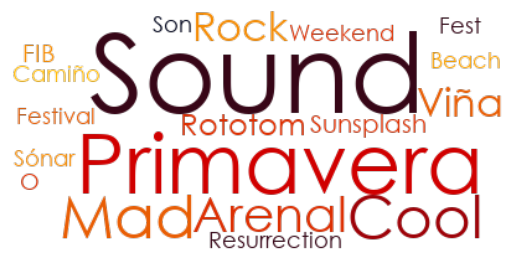

In [66]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


palette_10 = ["#03071e","#370617","#6a040f","#9d0208","#d00000","#dc2f02","#e85d04","#f48c06","#faa307","#ffba08"]


# Start with one review:
text = top_festivales_2022["festival"]

# Create and generate a word cloud image:
wordcloud = WordCloud(colormap=ListedColormap(palette_10), 
                      background_color=None, mode="RGBA",
                      prefer_horizontal = 1,
                      font_path="..\data\GOTHIC.TTF").generate(" ".join(text))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig(r"graficos\nube_de_palabras_festivales_2019.png", format="png", transparent=True, dpi=300)
plt.show()

Datos de asistencia de los 10 festivales mas concurridos en 2019 (último año antes de la pandemia). Datos extraidos del Anuario de la música en vivo 2021

In [67]:
top_festivales_2019_entradas = pytesseract.image_to_string(r"..\data\datos_economicos\top_festivales_2019_entradas.JPG")
top_festivales_2019_entradas = top_festivales_2019_entradas.replace(".","").split("\n")
top_festivales_2019_entradas

['315000',
 '',
 '300000',
 '240000',
 '220000',
 '202000',
 '185000',
 '165000',
 '150000',
 '132000',
 '114000',
 '']

In [68]:
top_festivales_2019 = pytesseract.image_to_string(r"..\data\datos_economicos\top_festivales_2019.JPG")
top_festivales_2019 = top_festivales_2019.split("\n")
top_festivales_2019

['MEDUSA SUNBEACH FESTIVAL',
 'ARENAL SOUND',
 '',
 'VINA ROCK',
 '',
 'PRIMAVERA SOUND',
 'ROTOTOM SUNSPLASH',
 '',
 'MAD COOL FESTIVAL',
 'DREAMBEACH FESTIVAL',
 'WEEKEND BEACH FESTIVAL',
 'CABO DE PLATA',
 '']

In [69]:
top_10_festivales_2019 = {
                    "Medusa Sunbeach Festival": 315000,
                    "Arenal Sound": 300000,
                    "Viña Rock": 240000,
                    "Primavera Sound": 220000,
                    "Rototom Sunsplash": 202000,
                    "Mad Cool festival": 185000,
                    "Dreambeach Festival": 165000,
                    "Weekend Beach Festival": 150000,
                    "Cabo de Plata": 132000,
                    "FIB": 114000
                    }

In [70]:
df_top_10_festivales_2019 = pd.DataFrame(top_10_festivales_2019, index=[0])
df_top_10_festivales_2019 = df_top_10_festivales_2019.T
df_top_10_festivales_2019 = df_top_10_festivales_2019.rename(columns = {"0": "asistentes"})
df_top_10_festivales_2019.rename(columns={'asistentes': 'asistentes_2019'}, inplace= True)
df_top_10_festivales_2019 = df_top_10_festivales_2019.reset_index()
df_top_10_festivales_2019.rename(columns={'index': 'festival'}, inplace= True)
df_top_10_festivales_2019

,festival,0
0,Medusa Sunbeach Festival,315000
1,Arenal Sound,300000
2,Viña Rock,240000
3,Primavera Sound,220000
4,Rototom Sunsplash,202000
5,Mad Cool festival,185000
6,Dreambeach Festival,165000
7,Weekend Beach Festival,150000
8,Cabo de Plata,132000
9,FIB,114000


In [71]:
df_top_2019 = df_top_10_festivales_2019
for index, row in df_top_2019.iterrows():
    df_top_2019.at[index, "festival"]= row["festival"].replace(" ","")

In [72]:
df_top_2019 = {
                    "Medusa Sunbeach ": 315000,
                    "Arenal Sound ": 300000,
                    "Viña Rock ": 240000,
                    "Primavera Sound ": 220000,
                    "Rototom Sunsplash ": 202000,
                    "Mad Cool ": 185000,
                    "Dreambeach Festival ": 165000,
                    "Weekend Beach ": 150000,
                    "Cabo de Plata ": 132000,
                    "FIB ": 114000}

dias_festivales_2019 = [6,6,3,6,7,3,5,4,4,4]
df_dias_dfestivales_2019 = pd.DataFrame(dias_festivales_2019)
df_2019 = pd.DataFrame(df_top_2019, index=[0]).T.reset_index()
df_2019 = df_2019.rename(columns= {"index": "festival", 0: "asistentes"})
df_2019 = pd.concat([df_2019, df_dias_dfestivales_2019], axis=1)
df_2019 = df_2019.rename(columns= {0: "dias"})
df_2019

,festival,asistentes,dias
0,Medusa Sunbeach,315000,6
1,Arenal Sound,300000,6
2,Viña Rock,240000,3
3,Primavera Sound,220000,6
4,Rototom Sunsplash,202000,7
5,Mad Cool,185000,3
6,Dreambeach Festival,165000,5
7,Weekend Beach,150000,4
8,Cabo de Plata,132000,4
9,FIB,114000,4


Gráfico con los festivales de mayor asistencia en 2019

In [73]:
import plotly.express as px

palette = ["#660000","#990033","#5F021F","#8C001A","#FF9000"]
palette_11 = ["#03071e","#370617","#6a040f","#9d0208","#d00000","#dc2f02","#e85d04","#f48c06","#faa307","#ffba08", "#FFC42D"]
values = df_2019["dias"]

fig = px.bar(df_2019,
            x='asistentes',
            y='festival')

fig.update_traces(
                marker_color=np.tile(palette_11[::-1], len(df_2019["festival"])),
                text=values,
                textposition='auto',
                textfont=dict(size=16))

fig.update_xaxes(
                tickangle=-45,
                tickfont=dict(size=18))

fig.update_yaxes(
                tickfont=dict(size=18),
                gridcolor='gray')


fig.update_layout(
                    width=1000,
                    height=600,
                    title_text="Top 10 festivales. Asistencia 2019",
                    title_font=dict(size=30),
                    title_x=0.85, title_y=0.97,
                    plot_bgcolor='rgba(0,0,0,0)',
                    paper_bgcolor='rgba(0,0,0,0)',
                    yaxis_title='Festivales',
                    xaxis_title='Asistentes',
                    yaxis_title_font=dict(size=25),
                    xaxis_title_font=dict(size=25),
                    font=dict(family='Century Gothic'),                           
                    showlegend=False)

fig.add_annotation(x=15, y=0.2, xanchor='left', yanchor='top',
                    text='Fuente: Anuario APM 2023',
                    font=dict(family='Century Gothic', size=13),
                    showarrow=False)                    

fig.write_image(r'graficos\grafico_barras_top_festivales_2019.png')
fig.show()

Nube de palabras de los festivales de mayor afluencia en 2019

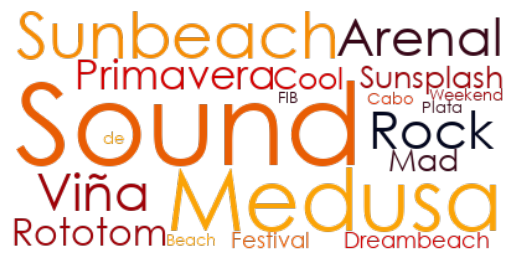

In [74]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


palette_10 = ["#03071e","#370617","#6a040f","#9d0208","#d00000","#dc2f02","#e85d04","#f48c06","#faa307","#ffba08"]


# Start with one review:
text = df_2019["festival"]

# Create and generate a word cloud image:
wordcloud = WordCloud(colormap=ListedColormap(palette_10), 
                      background_color=None, mode="RGBA",
                      prefer_horizontal = 1,
                      font_path="..\data\GOTHIC.TTF").generate(" ".join(text))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig(r"graficos\nube_de_palabras_festivales_2019.png", format="png", transparent=True, dpi=300)
plt.show()

Creo un diccionario para crear una nube de palabras y utilizarla de portada en la presentación, con los aspectos musicales mas importantes en el análisis de los datos de festivales

In [75]:
dict_columns = {'duración': 1500,
                'artistas':-500,
                'estilos':-20,
                'gratuito': 5800,
                'mes': 700}

dict_columns = pd.DataFrame(dict_columns, index=[0]).T.reset_index()
dict_columns = dict_columns.rename(columns= {"index": "factores", 0: "importancia"})
dict_columns

,factores,importancia
0,duración,1500
1,artistas,-500
2,estilos,-20
3,gratuito,5800
4,mes,700


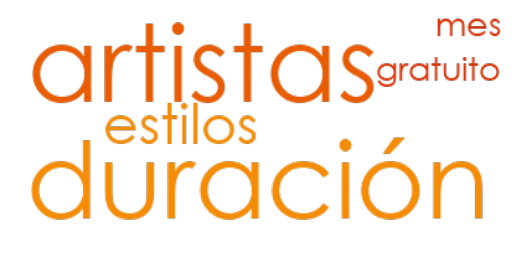

In [76]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

palette_10 = ["#03071e","#370617","#6a040f","#9d0208","#d00000","#dc2f02","#e85d04","#f48c06","#faa307","#ffba08"]

# Start with one review:
text = dict_columns["factores"]

# Create and generate a word cloud image:
wordcloud = WordCloud(colormap=ListedColormap(palette_10), 
                      background_color=None, mode="RGBA",
                      prefer_horizontal = 1,
                      font_path="..\data\GOTHIC.TTF").generate(" ".join(text))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig(r"graficos\nube_de_palabras.png", format="png", transparent=True, dpi=300)
plt.show()

Creo un diccionario para crear una nube de palabras y utilizarla de portada en la presentación, con los aspectos musicales mas importantes en el análisis de los datos de festivales

In [77]:
dict_columns_musical = {'festival': 1500,
                        'lugar':12,
                        'fechaInicio':-500,
                        'fechaFin':-20,
                        'artistas': 70,
                        'estilos': 20,
                        'imagenCartel': 2}

dict_columns_musical = pd.DataFrame(dict_columns_musical, index=[0]).T.reset_index()
dict_columns_musical = dict_columns_musical.rename(columns= {"index": "factores", 0: "importancia"})
dict_columns_musical

,factores,importancia
0,festival,1500
1,lugar,12
2,fechaInicio,-500
3,fechaFin,-20
4,artistas,70
5,estilos,20
6,imagenCartel,2


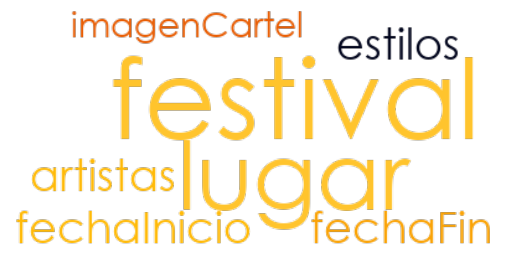

In [78]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


palette_12 = ["#03071e","#370617","#6a040f","#9d0208","#d00000","#dc2f02","#e85d04","#f48c06","#faa307","#ffba08", "#FFC42D", "#FFCD50"]


# Start with one review:
text = dict_columns_musical["factores"]

# Create and generate a word cloud image:
wordcloud = WordCloud(colormap=ListedColormap(palette_12), 
                      background_color=None, mode="RGBA",
                      prefer_horizontal = 1,
                      font_path="..\data\GOTHIC.TTF").generate(" ".join(text))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig(r"graficos\nube_de_palabras_columnas_musical.png", format="png", transparent=True, dpi=300)
plt.show()

Creo un diccionario para crear una nube de palabras y utilizarla de portada en la presentación, con los aspectos económicos mas importantes en el análisis de los datos de festivales

In [79]:
dict_columns_economico = {'evolución anual': 1500,
                        'facturación provincial': 3000,
                        'facturación autonómica':-500,
                        'asistencia festivales':-20}

dict_columns_economico = pd.DataFrame(dict_columns_economico, index=[0]).T.reset_index()
dict_columns_economico = dict_columns_economico.rename(columns= {"index": "factores", 0: "importancia"})
dict_columns_economico

,factores,importancia
0,evolución anual,1500
1,facturación provincial,3000
2,facturación autonómica,-500
3,asistencia festivales,-20


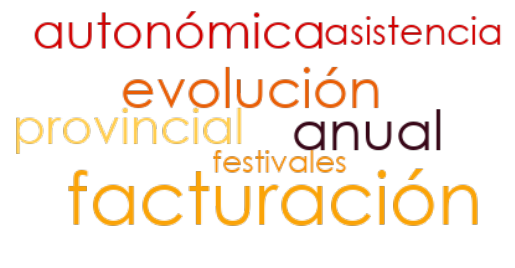

In [80]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


palette_12 = ["#03071e","#370617","#6a040f","#9d0208","#d00000","#dc2f02","#e85d04","#f48c06","#faa307","#ffba08", "#FFC42D", "#FFCD50"]


# Start with one review:
text = dict_columns_economico["factores"]

# Create and generate a word cloud image:
wordcloud = WordCloud(colormap=ListedColormap(palette_12), 
                      background_color=None, mode="RGBA",
                      prefer_horizontal = 1,
                      font_path="..\data\GOTHIC.TTF").generate(" ".join(text))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig(r"graficos\nube_de_palabras_dataframes_economico.png", format="png", transparent=True, dpi=300)
plt.show()

Creo un diccionario para crear una nube de palabras y utilizarla de portada en la presentación, con los aspectos geográficos/ demográficos mas importantes en el análisis de los datos de festivales

In [81]:
dict_columns_geográficos = {'habitantes': 1500,
                        'tamaño población':12,
                        'provincia':-500,
                        'comunidad':-20,
                        'costa': 70,
                        'latitud': 20,
                        'longitud': 2}

dict_columns_geográficos = pd.DataFrame(dict_columns_geográficos, index=[0]).T.reset_index()
dict_columns_geográficos = dict_columns_geográficos.rename(columns= {"index": "factores", 0: "importancia"})
dict_columns_geográficos

,factores,importancia
0,habitantes,1500
1,tamaño población,12
2,provincia,-500
3,comunidad,-20
4,costa,70
5,latitud,20
6,longitud,2


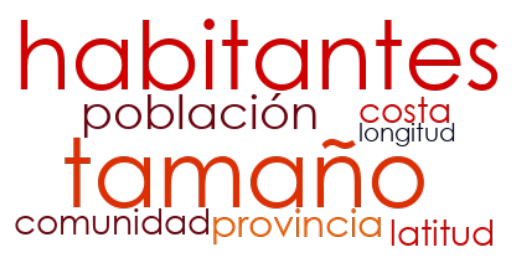

In [82]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


palette_7 = ["#03071e","#370617","#6a040f","#9d0208","#d00000","#dc2f02","#e85d04"]


# Start with one review:
text = dict_columns_geográficos["factores"]

# Create and generate a word cloud image:
wordcloud = WordCloud(colormap=ListedColormap(palette_7), 
                      background_color=None, mode="RGBA",
                      prefer_horizontal = 1,
                      font_path="..\data\GOTHIC.TTF").generate(" ".join(text))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig(r"graficos\nube_de_palabras_columnas_geografico_demografico.png", format="png", transparent=True, dpi=300)
plt.show()